In [102]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Завантаження даних

In [103]:
data = pd.read_csv('shopping_trends.csv')

Вибір числових стовпців та перейменування їх

In [104]:
selected_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
data = data[selected_columns]
data.columns = ['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases']

Масштабування даних

In [105]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Визначення оптимальної кількості кластерів

In [106]:
wcss = [] # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

Побудова графіка для визначення ліктьової точки

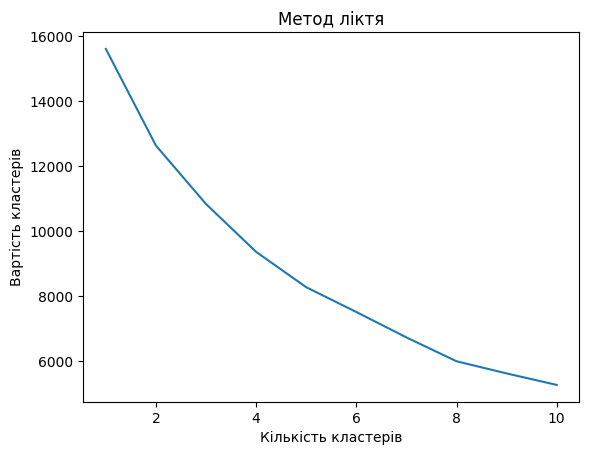

In [107]:
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.show()

Оптимальна кількість кластерів - 4

In [108]:
optimal_clusters = 4

Використання K-means

In [109]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

Візуалізація результатів з допомогою PCA

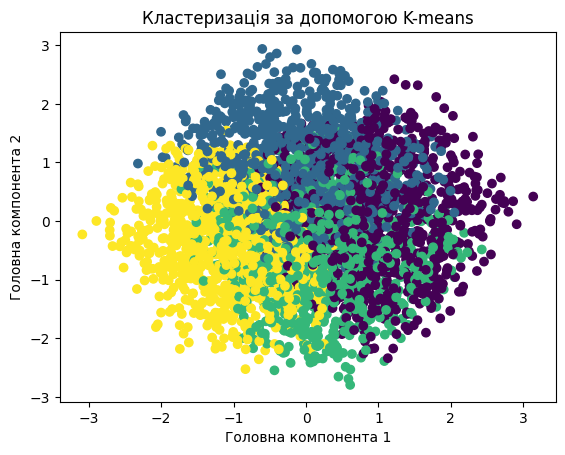

In [110]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Кластеризація за допомогою K-means')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

Висновки:

Ця лабораторна робота є прикладом того, як застосовувати методи підготовки та аналізу даних за допомогою кластеризації. Основні етапи включають вибір та підготовку числових ознак, визначення оптимальної кількості кластерів за допомогою методу ліктя, використання алгоритму K-means для кластеризації та візуалізація результатів за допомогою методу головних компонент.

Результати цієї роботи надають можливість отримати більш глибоке розуміння структури даних. Вони можуть бути використані для групування схожих об'єктів та виявлення внутрішніх закономірностей.

Кластеризація може бути дуже корисним інструментом для вирішення різноманітних завдань, таких як сегментація аудиторії, виявлення аномалій чи рекомендації персоналізованих пропозицій. Вона може полегшити аналіз великих обсягів даних та допомогти в розумінні складних зв'язків між об'єктами.

Загалом, кластеризація є потужним інструментом для розуміння та використання даних у багатьох областях, включаючи машинне навчання, аналіз даних, сегментацію ринку та багато інших. Навички, набуті в цій лабораторній роботі, можуть бути корисними в подальших дослідженнях та практичних застосуваннях аналізу даних.